In [92]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# 1. Read Data

In [93]:
df_train = pd.read_csv('train.csv')
df_train.shape

(15120, 56)

In [94]:
df_test = pd.read_csv('test.csv')
df_test.shape

(565892, 55)

In [95]:
df_train.columns

Index([u'Id', u'Elevation', u'Aspect', u'Slope',
       u'Horizontal_Distance_To_Hydrology', u'Vertical_Distance_To_Hydrology',
       u'Horizontal_Distance_To_Roadways', u'Hillshade_9am', u'Hillshade_Noon',
       u'Hillshade_3pm', u'Horizontal_Distance_To_Fire_Points',
       u'Wilderness_Area1', u'Wilderness_Area2', u'Wilderness_Area3',
       u'Wilderness_Area4', u'Soil_Type1', u'Soil_Type2', u'Soil_Type3',
       u'Soil_Type4', u'Soil_Type5', u'Soil_Type6', u'Soil_Type7',
       u'Soil_Type8', u'Soil_Type9', u'Soil_Type10', u'Soil_Type11',
       u'Soil_Type12', u'Soil_Type13', u'Soil_Type14', u'Soil_Type15',
       u'Soil_Type16', u'Soil_Type17', u'Soil_Type18', u'Soil_Type19',
       u'Soil_Type20', u'Soil_Type21', u'Soil_Type22', u'Soil_Type23',
       u'Soil_Type24', u'Soil_Type25', u'Soil_Type26', u'Soil_Type27',
       u'Soil_Type28', u'Soil_Type29', u'Soil_Type30', u'Soil_Type31',
       u'Soil_Type32', u'Soil_Type33', u'Soil_Type34', u'Soil_Type35',
       u'Soil_Type36', 

In [96]:
df_test.columns

Index([u'Id', u'Elevation', u'Aspect', u'Slope',
       u'Horizontal_Distance_To_Hydrology', u'Vertical_Distance_To_Hydrology',
       u'Horizontal_Distance_To_Roadways', u'Hillshade_9am', u'Hillshade_Noon',
       u'Hillshade_3pm', u'Horizontal_Distance_To_Fire_Points',
       u'Wilderness_Area1', u'Wilderness_Area2', u'Wilderness_Area3',
       u'Wilderness_Area4', u'Soil_Type1', u'Soil_Type2', u'Soil_Type3',
       u'Soil_Type4', u'Soil_Type5', u'Soil_Type6', u'Soil_Type7',
       u'Soil_Type8', u'Soil_Type9', u'Soil_Type10', u'Soil_Type11',
       u'Soil_Type12', u'Soil_Type13', u'Soil_Type14', u'Soil_Type15',
       u'Soil_Type16', u'Soil_Type17', u'Soil_Type18', u'Soil_Type19',
       u'Soil_Type20', u'Soil_Type21', u'Soil_Type22', u'Soil_Type23',
       u'Soil_Type24', u'Soil_Type25', u'Soil_Type26', u'Soil_Type27',
       u'Soil_Type28', u'Soil_Type29', u'Soil_Type30', u'Soil_Type31',
       u'Soil_Type32', u'Soil_Type33', u'Soil_Type34', u'Soil_Type35',
       u'Soil_Type36', 

In [97]:
df_train.Cover_Type.value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

# 2. Split data into train, test, dev

In [98]:
df = pd.read_csv('train.csv')

In [99]:
from sklearn.model_selection import train_test_split
train_df, test_dev_df = train_test_split(df, random_state=1)
test_df, dev_df = train_test_split(test_dev_df, random_state=1)

In [100]:
train_df.shape

(11340, 56)

In [101]:
test_df.shape

(2835, 56)

In [102]:
dev_df.shape

(945, 56)

In [103]:
train_df.Cover_Type.value_counts()

5    1647
6    1631
3    1630
7    1628
1    1608
2    1599
4    1597
Name: Cover_Type, dtype: int64

In [104]:
test_df.Cover_Type.value_counts()

2    427
4    421
1    413
6    400
7    393
5    393
3    388
Name: Cover_Type, dtype: int64

In [105]:
dev_df.Cover_Type.value_counts()

4    142
3    142
7    139
1    139
2    134
6    129
5    120
Name: Cover_Type, dtype: int64

# 3. Split data_frame into X and y

In [106]:
y_train = train_df.Cover_Type     # train_y is a pandas.core.series.Series
y_dev = dev_df.Cover_Type
y_test = test_df.Cover_Type

In [107]:
feature_columns = df_test.columns

X_train = train_df[feature_columns]
X_dev = dev_df[feature_columns]
X_test = test_df[feature_columns]

# 4. KNN 

Without feature engineering, for the baseline.

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()                                  # KNN classifier

parameter_grid = {'n_neighbors': range(1,26)}                 # parameters to search
parameter_searcher = GridSearchCV(knn, parameter_grid, cv=5)  # GridSearchCV
parameter_searcher.fit(X_train, y_train)                      # fit

print 'Best parameter:', parameter_searcher.best_params_      # best parameter for KNN
print 'Best score:', parameter_searcher.best_score_.round(4)  # best score for KNN

Best parameter: {'n_neighbors': 1}
Best score: 0.8394


In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

knn = KNeighborsClassifier(n_neighbors = parameter_searcher.best_params_['n_neighbors'])
knn.fit(X_train, y_train)

print 'F1 score on dev data:', f1_score(y_dev, knn.predict(X_dev), average='weighted').round(4)
print 'F1 score on test data:', f1_score(y_test, knn.predict(X_test), average='weighted').round(4)

F1 score on dev data: 0.846
F1 score on test data: 0.8415


In [111]:
F1_dev = []
F1_train = []
for n in range(1,25):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    F1_dev.append(f1_score(y_dev, knn.predict(X_dev), average='weighted').round(4))
    F1_train.append(f1_score(y_train, knn.predict(X_train), average='weighted').round(4))

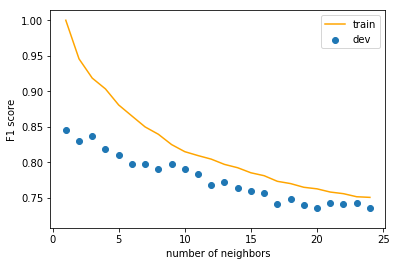

In [112]:
plt.scatter(range(1,25), F1_dev, label = 'dev')
plt.plot(range(1,25), F1_train, label = 'train', color='orange')
plt.xlabel('number of neighbors')
plt.ylabel('F1 score')
plt.legend()
plt.show()

### Write Predictions to CSV 

In [ ]:
df_test

In [153]:
pred = knn.predict(df_test)
ID = df_test.Id

data_out = []
for i in range(len(ID)):
    data_out.append({'ID':ID.iloc[i], 'Cover_Type':pred[i]})
#data_out

In [154]:
len(data_out)

565892

In [155]:
import csv
with open('test_submission.csv', 'wt') as fout:
    cout = csv.DictWriter(fout, ['ID','Cover_Type'])
    cout.writeheader()
    cout.writerows(data_out)

# 5. EDA

In [23]:
# data types
X_train.dtypes
X_train.dtypes.value_counts()

int64    55
dtype: int64

In [40]:
# Check missing values, following methods give same results, no missing values
# X_train.apply(lambda col: col.isnull().sum())
X_train.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [38]:
# distribution of target is almost uniform
y_train.value_counts()

5    1647
6    1631
3    1630
7    1628
1    1608
2    1599
4    1597
Name: Cover_Type, dtype: int64

### Distribution of variables

In [58]:
X_train.columns

Index([u'Id', u'Elevation', u'Aspect', u'Slope',
       u'Horizontal_Distance_To_Hydrology', u'Vertical_Distance_To_Hydrology',
       u'Horizontal_Distance_To_Roadways', u'Hillshade_9am', u'Hillshade_Noon',
       u'Hillshade_3pm', u'Horizontal_Distance_To_Fire_Points',
       u'Wilderness_Area1', u'Wilderness_Area2', u'Wilderness_Area3',
       u'Wilderness_Area4', u'Soil_Type1', u'Soil_Type2', u'Soil_Type3',
       u'Soil_Type4', u'Soil_Type5', u'Soil_Type6', u'Soil_Type7',
       u'Soil_Type8', u'Soil_Type9', u'Soil_Type10', u'Soil_Type11',
       u'Soil_Type12', u'Soil_Type13', u'Soil_Type14', u'Soil_Type15',
       u'Soil_Type16', u'Soil_Type17', u'Soil_Type18', u'Soil_Type19',
       u'Soil_Type20', u'Soil_Type21', u'Soil_Type22', u'Soil_Type23',
       u'Soil_Type24', u'Soil_Type25', u'Soil_Type26', u'Soil_Type27',
       u'Soil_Type28', u'Soil_Type29', u'Soil_Type30', u'Soil_Type31',
       u'Soil_Type32', u'Soil_Type33', u'Soil_Type34', u'Soil_Type35',
       u'Soil_Type36', 

In [59]:
numeric_features = X_train.columns[1:11]
numeric_features

Index([u'Elevation', u'Aspect', u'Slope', u'Horizontal_Distance_To_Hydrology',
       u'Vertical_Distance_To_Hydrology', u'Horizontal_Distance_To_Roadways',
       u'Hillshade_9am', u'Hillshade_Noon', u'Hillshade_3pm',
       u'Horizontal_Distance_To_Fire_Points'],
      dtype='object')

In [74]:
categorical_features = X_train.columns[11:]
categorical_features

Index([u'Wilderness_Area1', u'Wilderness_Area2', u'Wilderness_Area3',
       u'Wilderness_Area4', u'Soil_Type1', u'Soil_Type2', u'Soil_Type3',
       u'Soil_Type4', u'Soil_Type5', u'Soil_Type6', u'Soil_Type7',
       u'Soil_Type8', u'Soil_Type9', u'Soil_Type10', u'Soil_Type11',
       u'Soil_Type12', u'Soil_Type13', u'Soil_Type14', u'Soil_Type15',
       u'Soil_Type16', u'Soil_Type17', u'Soil_Type18', u'Soil_Type19',
       u'Soil_Type20', u'Soil_Type21', u'Soil_Type22', u'Soil_Type23',
       u'Soil_Type24', u'Soil_Type25', u'Soil_Type26', u'Soil_Type27',
       u'Soil_Type28', u'Soil_Type29', u'Soil_Type30', u'Soil_Type31',
       u'Soil_Type32', u'Soil_Type33', u'Soil_Type34', u'Soil_Type35',
       u'Soil_Type36', u'Soil_Type37', u'Soil_Type38', u'Soil_Type39',
       u'Soil_Type40'],
      dtype='object')

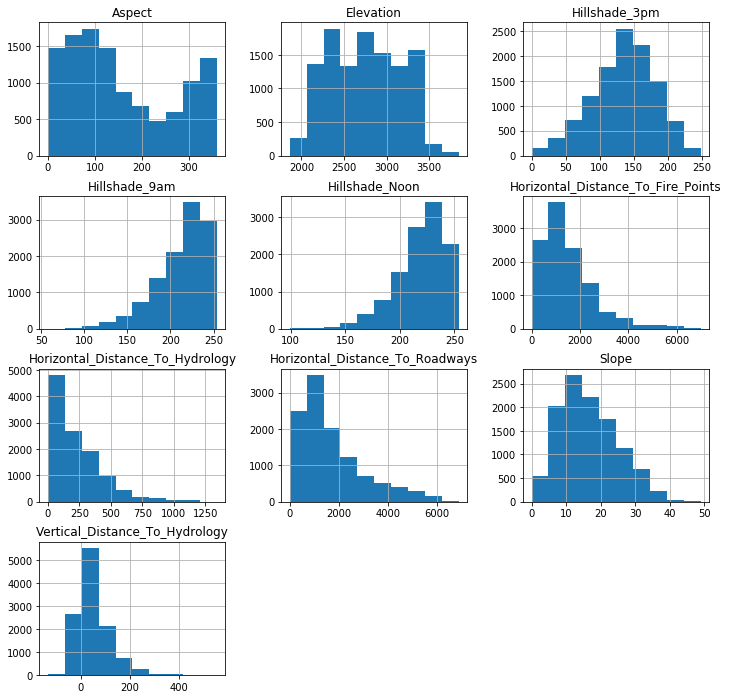

In [89]:
#X_train[['Elevation', 'Aspect','Slope']].hist()

X_train[numeric_features].hist(figsize=(12,12))
plt.show()

In [70]:
X_train[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,11340.0,2749.620723,417.808200,1863.0,2376.0,2751.0,3103.0,3846.0
Aspect,11340.0,156.266138,110.192472,0.0,64.0,124.0,260.0,360.0
Slope,11340.0,16.502557,8.441615,0.0,10.0,15.0,22.0,49.0
Horizontal_Distance_To_Hydrology,11340.0,227.047707,209.623473,0.0,67.0,180.0,324.0,1343.0
Vertical_Distance_To_Hydrology,11340.0,51.372840,61.590572,-134.0,5.0,33.0,80.0,554.0
Horizontal_Distance_To_Roadways,11340.0,1705.479894,1318.869380,0.0,752.0,1315.0,2260.0,6890.0
Hillshade_9am,11340.0,212.800088,30.313149,58.0,196.0,220.0,235.0,254.0
Hillshade_Noon,11340.0,218.867549,22.916015,99.0,207.0,223.0,235.0,254.0
Hillshade_3pm,11340.0,134.902910,46.017597,0.0,106.0,138.0,167.0,248.0
Horizontal_Distance_To_Fire_Points,11340.0,1505.621164,1094.225093,0.0,726.0,1249.0,1975.0,6993.0


In [ ]:
for col in categorical_features:
    print col
    print X_train[col].value_counts()

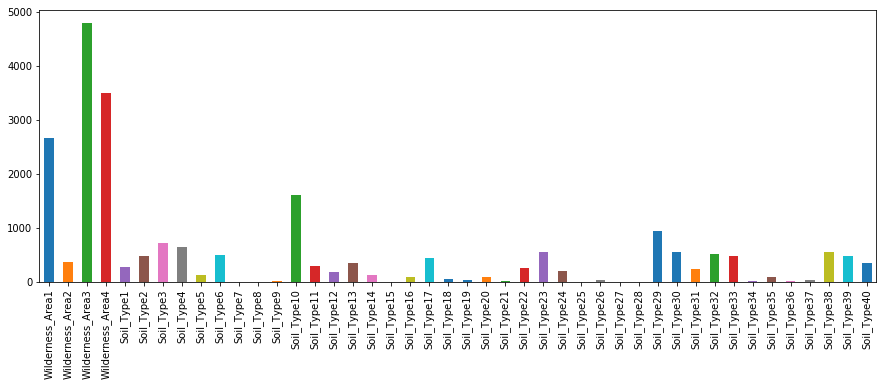

In [88]:
X_train[categorical_features].sum(axis=0).plot(kind='bar', figsize=(15,5))
plt.show()